# Lesson 12: 심슨의 역설

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/PP2023SUM/blob/main/posts/Day3/ls12.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

# Imports

In [66]:
import pandas as pd
import numpy as np
from plotnine import *

# 심슨의 역설

`-` 버클리대학교의 입학데이터

-   <https://github.com/guebin/DV2023/blob/main/posts/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다.

-   1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬
    많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다.

In [67]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

# 전체합격률 시각화

## A. 시각화1: 전체합격률 시각화 – pandas 초보

`-` 여성지원자의 합격률

In [87]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(total = lambda df: df['fail']+df['pass'])\
.assign(rate = lambda df: df['pass']/df['total'])

In [5]:
df.query('gender == "female" and result =="pass"')['count'].sum() / df.query('gender == "female"')['count'].sum()

`-` 남성지원자의 합격률

In [6]:
df.query('gender == "male" and result =="pass"')['count'].sum() / df.query('gender == "male"')['count'].sum()

`-` 시각화

In [7]:
tidydata = pd.DataFrame({'sex':['male','female'],'rate':[0.5202526941657376,0.420708446866485]})
tidydata

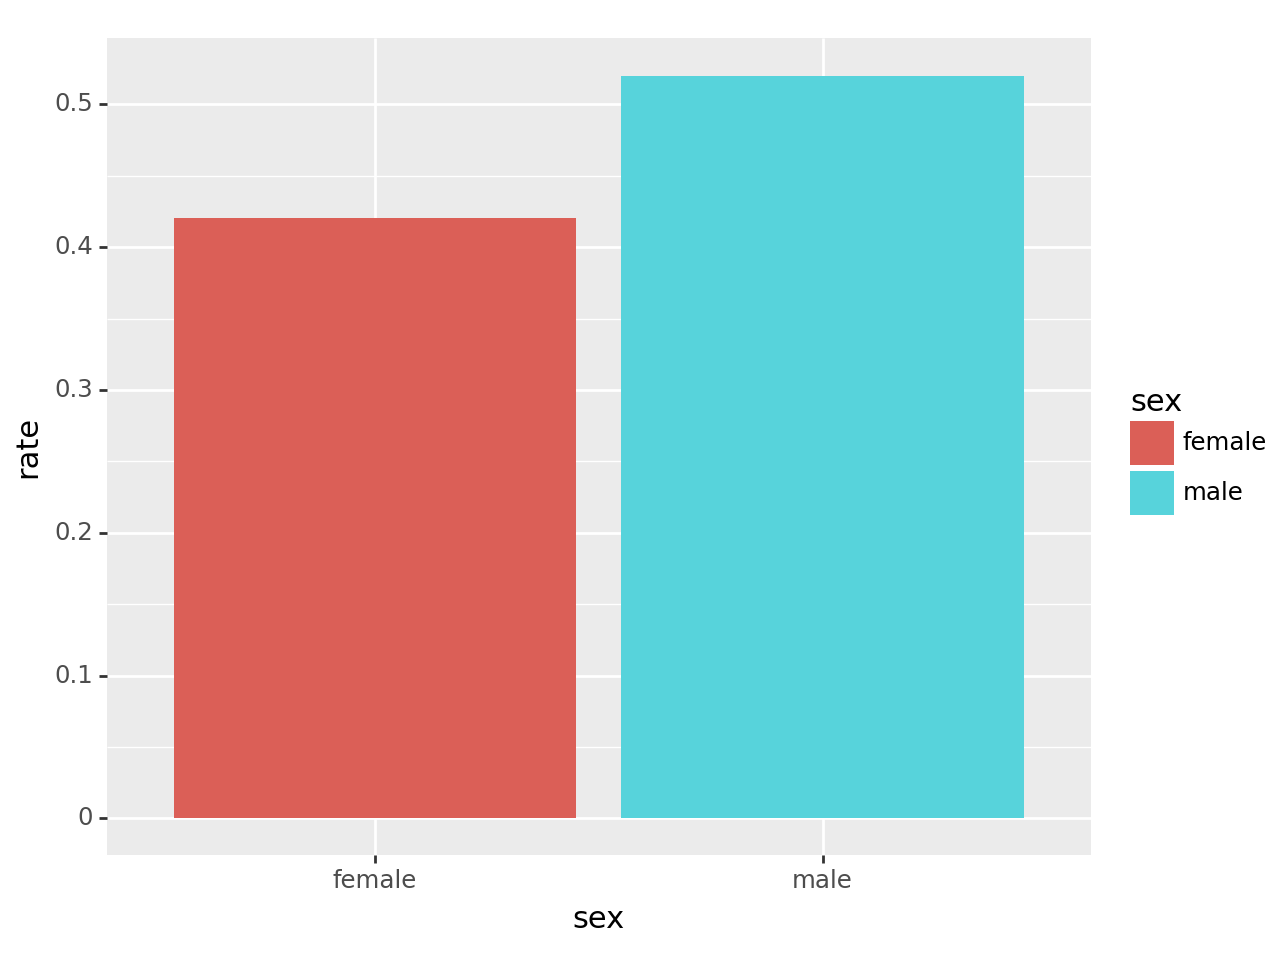

In [8]:
fig = ggplot(tidydata)
col = geom_col(aes(x='sex',y='rate',fill='sex'))
fig + col

## B. 시각화1: 전체합격률 시각화 – pandas 고수

/tmp/ipykernel_1307301/2552015845.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

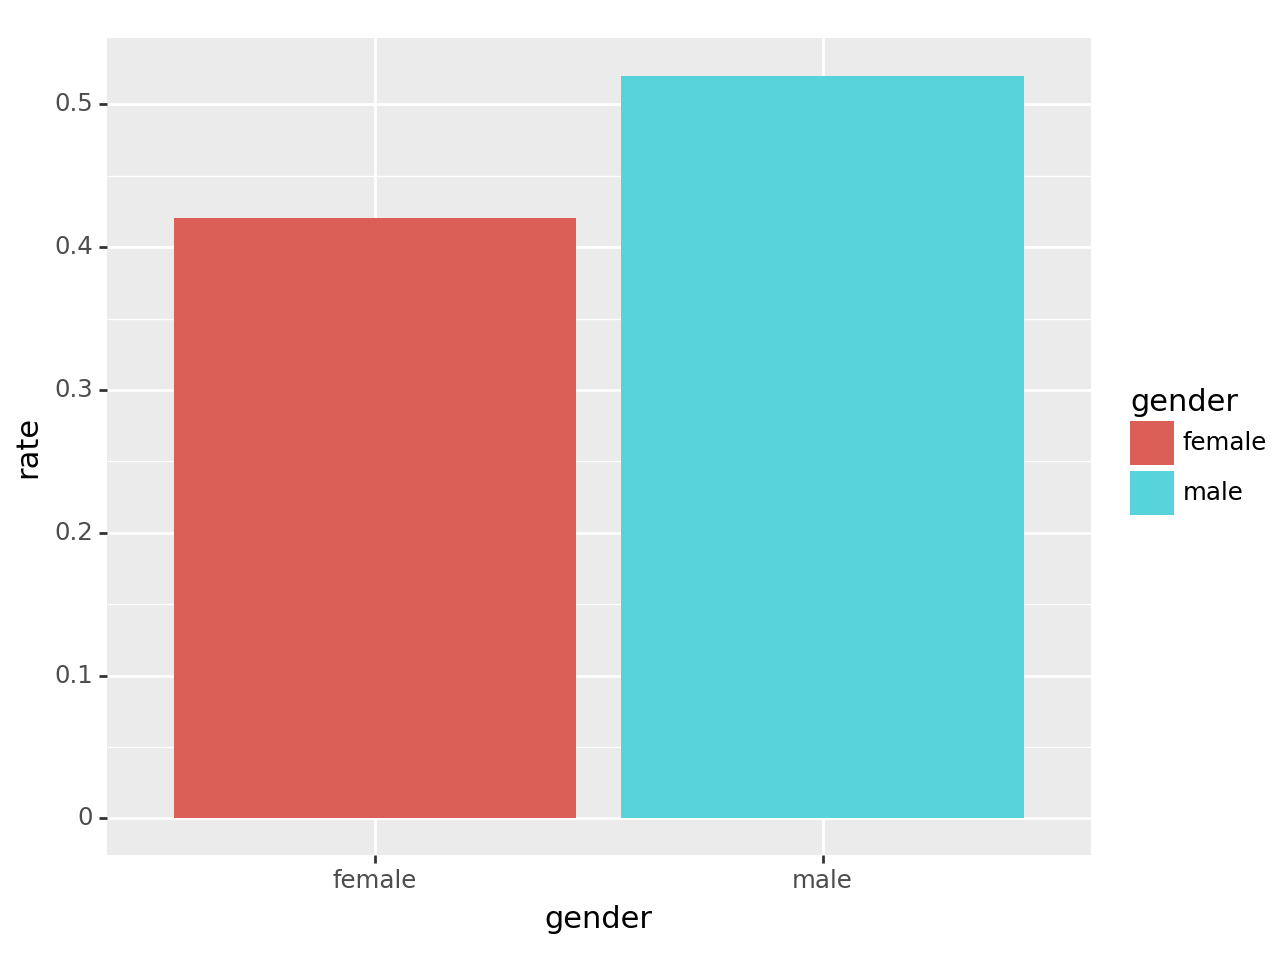

In [9]:
tidydata = df.pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(rate = lambda df: df['pass'] / (df['fail'] + df['pass']))\
.reset_index()

fig = ggplot(tidydata) 
col = geom_col(aes(x='gender',y='rate',fill='gender'))
fig + col 

# 학과별 합격률 시각화

/tmp/ipykernel_1307301/2165066459.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

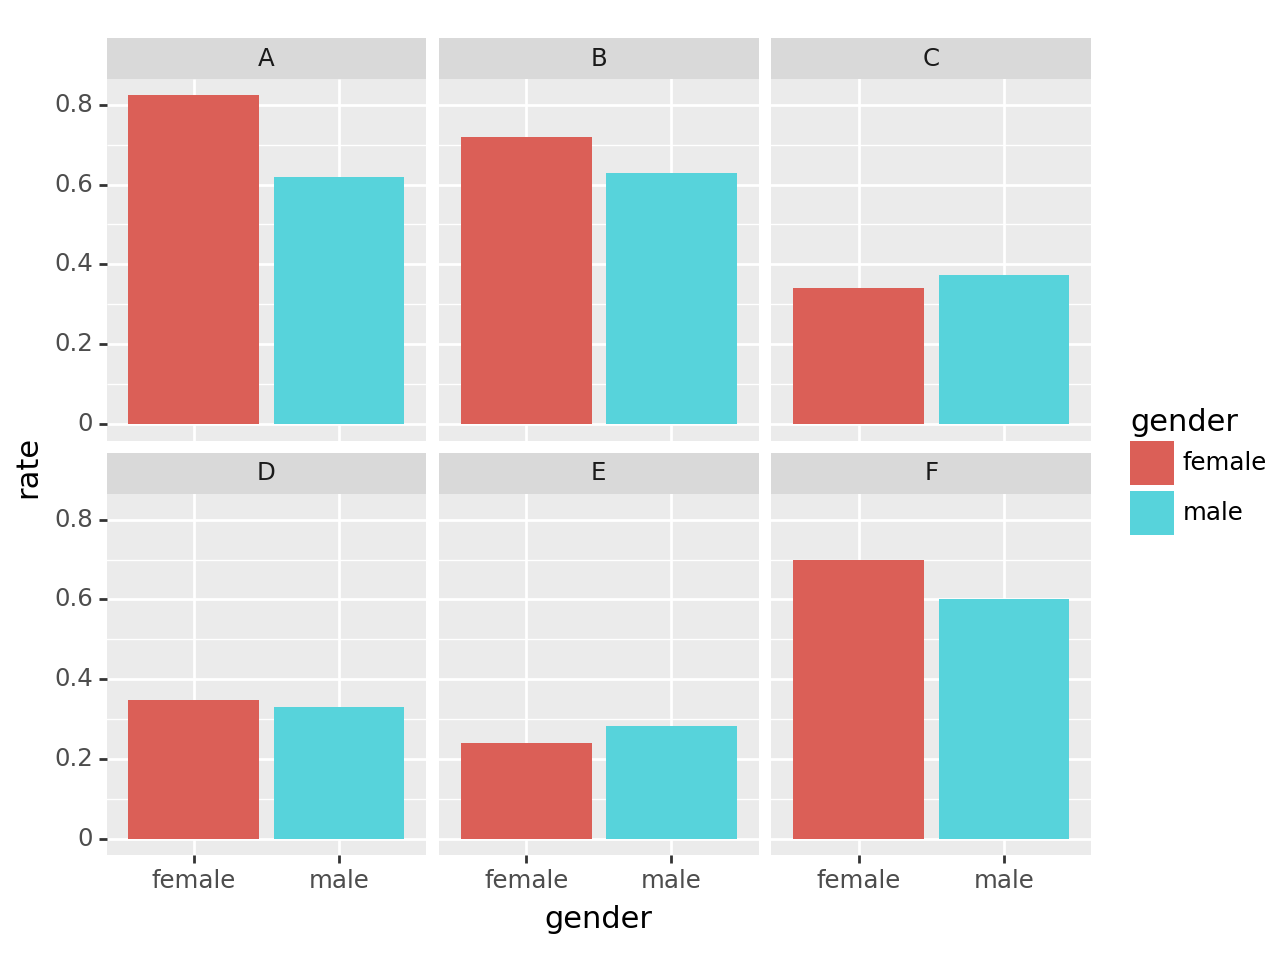

In [11]:
tidydata = df.pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)\
.assign(rate = lambda df: df['pass']/(df['fail']+df['pass']))\
.reset_index()

fig = ggplot(tidydata) 
facet = facet_wrap('department')
col = geom_col(aes(x='gender',y='rate',fill='gender'))
fig + facet + col 

# 해석

`-` 전체합격률: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

`-` 학과별합격률: 학과별로 살펴보니 오히려 A,B,F,D의 경우 여성의
합격률이 높다.

`-` 교재에서 설명한 이유: 여성이 합격률이 낮은 학과에만 많이 지원하였기
때문

In [12]:
df.pivot_table(index='department', columns='gender', values='count',aggfunc='sum')\
.stack().reset_index().rename({0:'count'},axis=1)

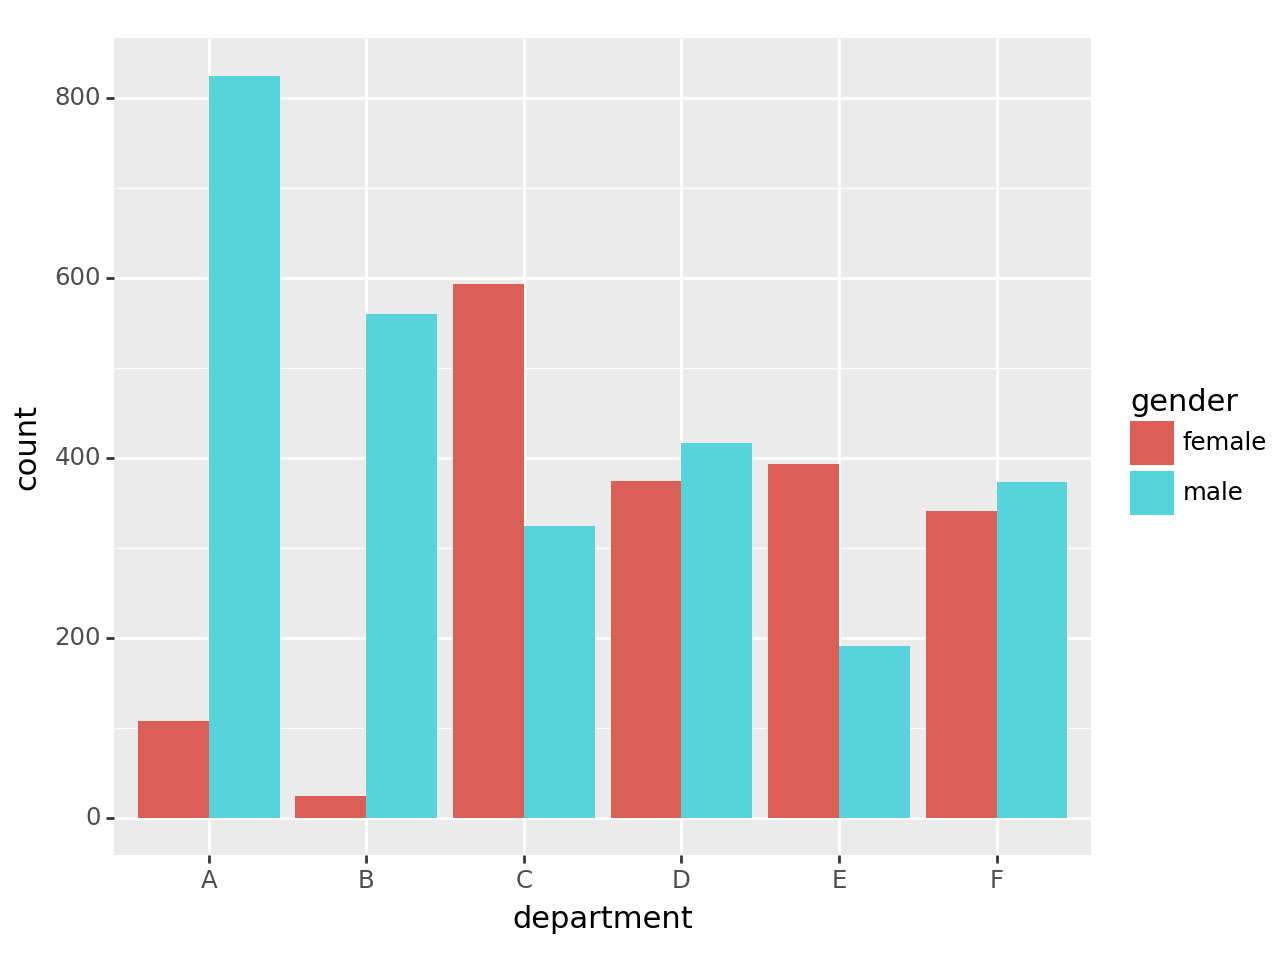

In [13]:
tidydata = df.pivot_table(index='department', columns='gender', values='count',aggfunc='sum')\
.stack().reset_index().rename({0:'count'},axis=1)

 
fig = ggplot(tidydata) 
col = geom_col(aes(x='department',y='count',fill='gender'),position='dodge')
fig+col

# 더 극단적인 예시

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

`-` 전체합격률 조사

In [57]:
display(
    f"합격률(여성):{601/1001:.4f}",
    df[df.gender=='female'],
    f"합격률(남성):{901/1002:.4f}",
    df[df.gender=='male'],
)

`-` 학과별 합격률 조사

In [52]:
df

In [56]:
display(
    f"합격률(A학과,여성):{1/1:.4f}",
    f"합격률(A학과,남성):{900/1000:.4f}",
    f"합격률(B학과,여성):{600/1000:.4f}",
    f"합격률(B학과,여성):{1/2:.4f}",
)